In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Input dataset
data = pd.read_csv('/content/dataset_2.csv')

# Change the categorical variables into One-hot encoding
data_encoded = pd.get_dummies(data, columns=['needed', 'covered'])

# Convert ratings to integers
data_encoded['rating'] = data_encoded['rating'].astype(int)

# Split data into training and testing sets
train_data, test_data = train_test_split(data_encoded, test_size=0.2, random_state=42)

# Separate features and target variables
train_features = train_data.drop(['technicians_id', 'rating'], axis=1)
train_target = train_data[['technicians_id', 'rating']]
test_features = test_data.drop(['technicians_id', 'rating'], axis=1)
test_target = test_data[['technicians_id', 'rating']]

# Define model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_features.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(train_target.shape[1], activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(train_features, train_target, epochs=250, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_features, test_target)

Epoch 1/250
2/2 [==============================] - 1s 186ms/step - loss: 66.4618 - accuracy: 0.8906 - val_loss: 37.8199 - val_accuracy: 1.0000
Epoch 2/250
2/2 [==============================] - 0s 34ms/step - loss: 42.0923 - accuracy: 0.8906 - val_loss: 50.3086 - val_accuracy: 1.0000
Epoch 3/250
2/2 [==============================] - 0s 34ms/step - loss: 38.4329 - accuracy: 0.8906 - val_loss: 33.7959 - val_accuracy: 1.0000
Epoch 4/250
2/2 [==============================] - 0s 58ms/step - loss: 29.8584 - accuracy: 0.8906 - val_loss: 35.0495 - val_accuracy: 1.0000
Epoch 5/250
2/2 [==============================] - 0s 35ms/step - loss: 32.3832 - accuracy: 0.8906 - val_loss: 37.3347 - val_accuracy: 1.0000
Epoch 6/250
2/2 [==============================] - 0s 38ms/step - loss: 32.7505 - accuracy: 0.8906 - val_loss: 34.1902 - val_accuracy: 1.0000
Epoch 7/250
2/2 [==============================] - 0s 37ms/step - loss: 29.6660 - accuracy: 0.8906 - val_loss: 32.6205 - val_accuracy: 1.0000
Epoch

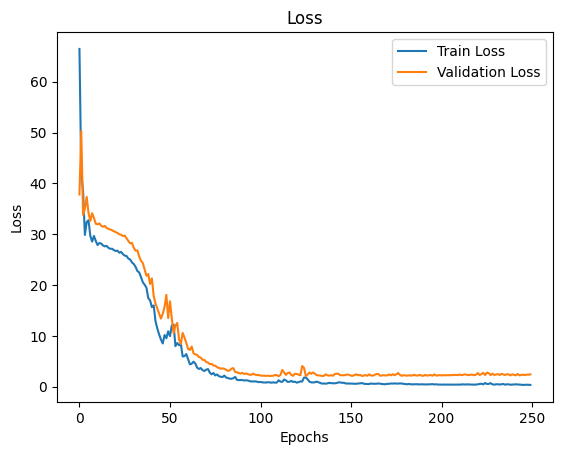

In [7]:
# Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
import tensorflow as tf

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

# Convert model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

import pathlib

tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## NOT FIXED / ERROR ## 
# Make predictions
needed_input = np.array([[user_id, needed_engine, needed_tire, needed_body, needed_interior, needed_oil] + [0] * (train_features.shape[1] - 6)])
predictions = model.predict(needed_input)
technician_id = np.argmax(predictions[0])
covered = np.argmax(predictions[1])
rating = np.argmax(predictions[2])

print(f"Technicians ID: {technicians_id}")
print(f"Covered: {covered}")
print(f"Rating: {rating}")
